# Categorical Cluster Analysis Exercise

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans

sns.set()

## Importing Data

In [29]:
data = pd.read_csv("../Datasets/Categorical.csv")

data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [30]:
data['continent'].unique()[0]

'North America'

In [32]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({"North America": 0, "Asia": 1, "Africa": 2, "Europe": 3, "South America": 4, "Oceania": 5, "Antarctica": 6, "Seven seas (open ocean)": 7})
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


In [33]:
x = data_mapped.iloc[:, 3:4]

kmeans = KMeans(8)
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([4, 1, 3, 4, 0, 0, 0, 1, 6, 1, 5, 2, 5, 7, 4, 5, 0, 1, 3, 0, 3, 3,
       1, 0, 1, 4, 4, 0, 4, 0, 4, 4, 6, 6, 4, 1, 1, 3, 3, 0, 6, 1, 3, 3,
       3, 3, 5, 6, 3, 3, 4, 4, 4, 4, 1, 1, 0, 0, 3, 4, 0, 4, 3, 6, 3, 3,
       0, 0, 3, 0, 5, 6, 0, 0, 5, 3, 0, 1, 0, 3, 3, 3, 3, 3, 0, 4, 4, 4,
       5, 6, 1, 7, 4, 0, 4, 0, 1, 0, 1, 1, 7, 0, 1, 1, 0, 1, 0, 4, 0, 1,
       1, 1, 1, 3, 1, 1, 5, 4, 1, 0, 1, 1, 1, 3, 3, 4, 0, 1, 3, 0, 0, 0,
       1, 4, 3, 0, 0, 3, 7, 4, 5, 0, 3, 0, 1, 0, 1, 5, 3, 3, 4, 7, 3, 1,
       3, 5, 3, 5, 3, 4, 5, 0, 0, 1, 5, 5, 1, 1, 4, 5, 6, 1, 5, 5, 0, 4,
       1, 0, 6, 1, 5, 1, 0, 0, 3, 3, 1, 3, 3, 3, 1, 7, 7, 5, 3, 4, 0, 3,
       3, 4, 0, 3, 6, 0, 0, 0, 3, 4, 7, 1, 4, 3, 3, 1, 1, 1, 1, 5, 4, 3,
       1, 1, 3, 3, 0, 6, 4, 1, 0, 4, 6, 4, 4, 1, 5, 5, 5, 1, 3, 3, 3])

In [34]:
data_mapped['Cluster'] = identified_clusters
data_mapped

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,4
1,Afghanistan,66.004734,33.835231,1,1
2,Angola,17.537368,-12.293361,2,3
3,Anguilla,-63.064989,18.223959,0,4
4,Albania,20.049834,41.142450,3,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,5
237,Yemen,47.586762,15.909280,1,1
238,South Africa,25.083901,-29.000341,2,3
239,Zambia,27.774759,-13.458242,2,3


(-90.0, 90.0)

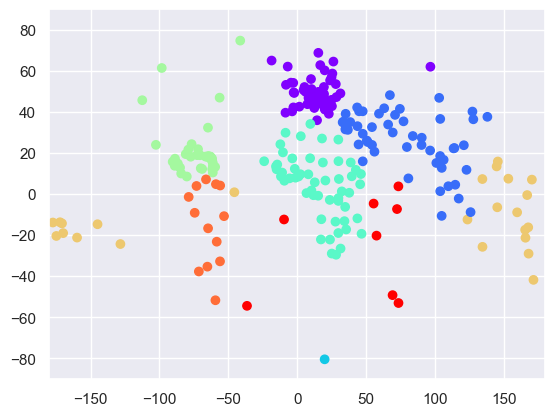

In [35]:
plt.scatter(data_mapped['Longitude'], data_mapped['Latitude'], c = data_mapped['Cluster'], cmap='rainbow')

plt.xlim(-180, 180)
plt.ylim(-90, 90)